## **Group Members :**
### $$Ayush\; 2019UMP6029$$
### $$Piyush\; 2019UMP6030$$
### $$Masiud\; 2019UMP6046$$
### $$Tabish\; 2019UMP6053$$

## TOOL MATERIAL :  EN31 STEEL

# Prediction of 

### $-->Material\; Removal\; Rate\; (MRR)$

### $--> Surface\; Roughness\; (Ra)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("doing.csv")
data.head()

,sno.,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage,MRR_(gm/min),R._(um)
0,1,200.0,1800,16,80,0.2121,11.98
1,2,400.0,1800,8,40,0.1329,10.57
2,3,200.0,1800,8,80,0.0999,10.02
3,4,300.0,1700,12,60,0.2275,10.95
4,5,300.0,1700,12,20,0.3895,12.20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sno.               81 non-null     int64  
 1   Pulse_on_time      81 non-null     float64
 2   Pulse_off_time     81 non-null     int64  
 3   Discharge_current  81 non-null     int64  
 4   Voltage            81 non-null     int64  
 5   MRR_(gm/min)       81 non-null     float64
 6   R._(um)            81 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 4.6 KB


In [4]:
data.isnull().sum()

sno.                 0
Pulse_on_time        0
Pulse_off_time       0
Discharge_current    0
Voltage              0
MRR_(gm/min)         0
R._(um)              0
dtype: int64

# MRR Datapoint Analysis

In [5]:
data_MRR = data.drop(['sno.','R._(um)'],axis=1)

In [6]:
data_MRR.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage,MRR_(gm/min)
0,200.0,1800,16,80,0.2121
1,400.0,1800,8,40,0.1329
2,200.0,1800,8,80,0.0999
3,300.0,1700,12,60,0.2275
4,300.0,1700,12,20,0.3895


In [7]:
x = data.drop(['sno.','MRR_(gm/min)','R._(um)'],axis=1)

In [8]:
x.keys()

Index(['Pulse_on_time', 'Pulse_off_time', 'Discharge_current', 'Voltage'], dtype='object')

In [9]:
x.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage
0,200.0,1800,16,80
1,400.0,1800,8,40
2,200.0,1800,8,80
3,300.0,1700,12,60
4,300.0,1700,12,20


In [10]:
y_MRR = data['MRR_(gm/min)']
y_R = data['R._(um)']

### correlation between Independent and dependent attributes

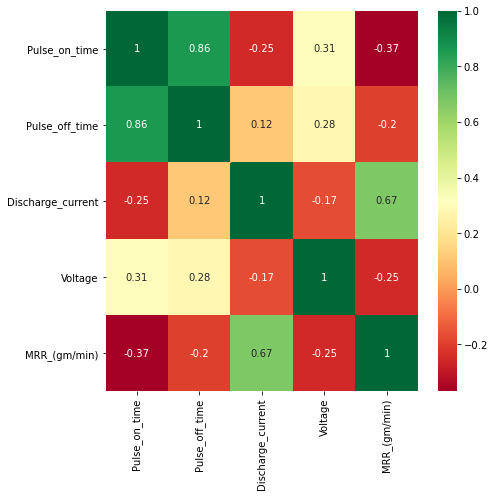

In [11]:
plt.figure(figsize = (7,7))
sns.heatmap(data_MRR.corr(), annot = True, cmap = "RdYlGn")

plt.show()

## Important feature using ExtraTreesRegressor


In [12]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y_MRR)

ExtraTreesRegressor()

In [13]:
print(selection.feature_importances_)

[0.44246031 0.02255834 0.49852722 0.03645413]


### plotting graph of feature importances for better visualization

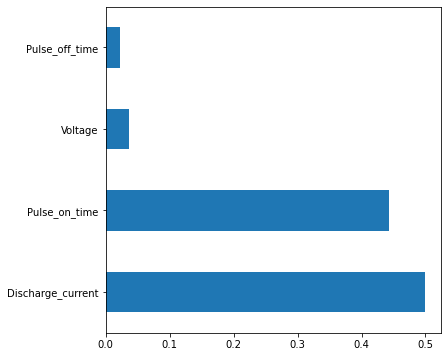

In [14]:
plt.figure(figsize = (6,6))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Splitting the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y_MRR, test_size = 0.25, random_state = 42)

### Standardize the dataset

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))


<AxesSubplot:xlabel='Discharge_current', ylabel='MRR_(gm/min)'>

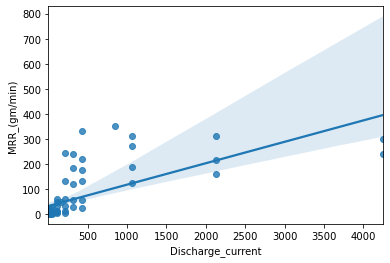

In [21]:
##not a Regression plot

import seaborn as sns
sns.regplot(x="Discharge_current",y="MRR_(gm/min)",data=data)

# Model Preparing 

# ______________

## Applying Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
y_pred = reg_rf.predict(X_test)

In [24]:
reg_rf.score(X_train, y_train)

0.9936600567376487

In [25]:
reg_rf.score(X_test, y_test)

0.862636307986923

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


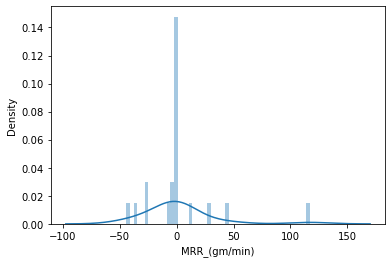

In [26]:
sns.distplot(y_test-y_pred)
plt.show()

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 16.759251380952378
MSE: 1014.397405435485
RMSE: 31.849606048356154


# Applying Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_LR = reg_lr.predict(X_test)

In [31]:
reg_lr.score(X_train, y_train)

0.5586023619567593

In [32]:
reg_lr.score(X_test, y_test)

0.47290734779249155

# Applying Support Vector Machine(SVM)

In [33]:
from sklearn.svm import SVR


In [34]:
reg_SVR = SVR(kernel ="linear")
reg_SVR.fit(X_train, y_train)
Y_pred_SVR = reg_SVR.predict(X_test)

# from sklearn.metrics import accuracy_score
# accuracy_score(Y_test, Y_pred)

In [35]:
reg_SVR.score(X_train, y_train)

0.1620909007411131

In [36]:
reg_SVR.score(X_test, y_test)

0.11991918845722238

# New data --> MRR prediction

In [37]:
x.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage
0,200.0,1800,16,80
1,400.0,1800,8,40
2,200.0,1800,8,80
3,300.0,1700,12,60
4,300.0,1700,12,20


In [38]:
datapoints = x.to_numpy()
datapoints

array([[2.000e+02, 1.800e+03, 1.600e+01, 8.000e+01],
       [4.000e+02, 1.800e+03, 8.000e+00, 4.000e+01],
       [2.000e+02, 1.800e+03, 8.000e+00, 8.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 6.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 2.000e+01],
       [3.000e+02, 1.500e+03, 1.200e+01, 6.000e+01],
       [4.000e+02, 1.800e+03, 1.600e+01, 4.000e+01],
       [2.000e+02, 1.800e+03, 8.000e+00, 4.000e+01],
       [4.000e+02, 1.800e+03, 8.000e+00, 8.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 6.000e+01],
       [2.000e+02, 1.600e+03, 1.600e+01, 8.000e+01],
       [4.000e+02, 1.600e+03, 8.000e+00, 4.000e+01],
       [4.000e+02, 1.600e+03, 1.600e+01, 8.000e+01],
       [2.000e+02, 1.600e+03, 8.000e+00, 4.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 6.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 6.000e+01],
       [5.000e+02, 1.700e+03, 1.200e+01, 6.000e+01],
       [3.000e+02, 1.700e+03, 1.200e+01, 1.000e+02],
       [3.000e+02, 1.700e+03, 2.000e+01, 6.000

In [39]:
scaler.transform(datapoints[3].reshape(1,-1))

E:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.13095676,  1.13614465, -0.4227147 ,  0.4472136 ]])

In [40]:
reg_rf.predict(scaler.transform(datapoints[1].reshape(1,-1)))

E:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.147696])

## Pickle file for deployment

In [41]:
import pickle

In [42]:
pickle.dump(reg_rf,open('reg_rf.pkl','wb'))
pickled_model=pickle.load(open('reg_rf.pkl','rb'))

In [43]:
pickled_model.predict(scaler.transform(datapoints[3].reshape(1,-1)))

E:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.227525])

# R prediction

In [44]:
x.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage
0,200.0,1800,16,80
1,400.0,1800,8,40
2,200.0,1800,8,80
3,300.0,1700,12,60
4,300.0,1700,12,20


In [45]:
y_R.head()

0    11.98
1    10.57
2    10.02
3    10.95
4    12.20
Name: R._(um), dtype: float64

In [46]:
data_R = pd.concat([x,y_R],axis=1)
data_R.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage,R._(um)
0,200.0,1800,16,80,11.98
1,400.0,1800,8,40,10.57
2,200.0,1800,8,80,10.02
3,300.0,1700,12,60,10.95
4,300.0,1700,12,20,12.20


In [47]:
### correlation between Independent and dependent attributes

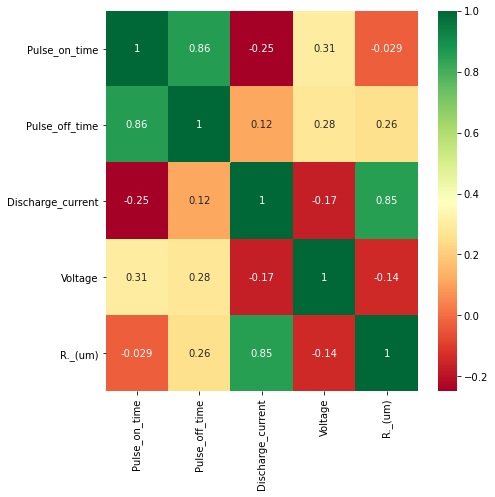

In [48]:
plt.figure(figsize = (7,7))
sns.heatmap(data_R.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [49]:
## Important feature using ExtraTreesRegressor


[0.13886093 0.13352486 0.72411399 0.00350021]


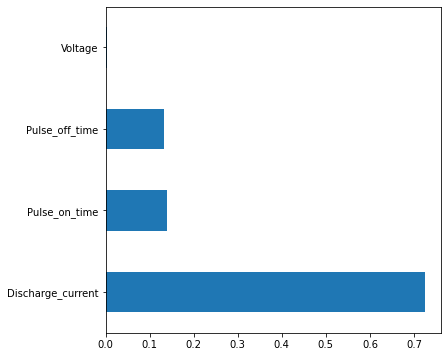

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y_R)

print(selection.feature_importances_)

### plotting graph of feature importances for better visualization

plt.figure(figsize = (6,6))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [51]:
data_R.head()

,Pulse_on_time,Pulse_off_time,Discharge_current,Voltage,R._(um)
0,200.0,1800,16,80,11.98
1,400.0,1800,8,40,10.57
2,200.0,1800,8,80,10.02
3,300.0,1700,12,60,10.95
4,300.0,1700,12,20,12.20


In [52]:
### Splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y_R, test_size = 0.25, random_state = 42)

# Model Preparing

## Applying Random Forest 

In [54]:
from sklearn.ensemble import RandomForestRegressor
reg_rf2 = RandomForestRegressor()
reg_rf2.fit(X_train2, y_train2)

RandomForestRegressor()

In [55]:
y_pred2 = reg_rf2.predict(X_test2)

In [56]:
reg_rf2.score(X_train2, y_train2)

0.9937714923603083

In [57]:
reg_rf2.score(X_test2, y_test2)

0.9521266639625587

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


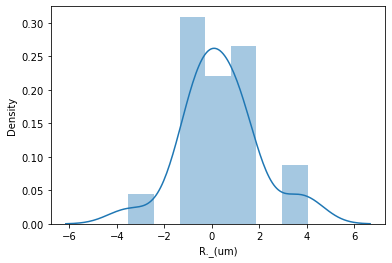

In [58]:
sns.distplot(y_test2-y_pred2)
plt.show()

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test2, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

MAE: 1.1531952380952413
MSE: 2.6082719814285786
RMSE: 1.6150145452684253


# Applying Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
reg_lr2 = LinearRegression()
reg_lr2.fit(X_train2, y_train2)


LinearRegression()

In [61]:
y_pred_LR_2 = reg_lr2.predict(X_test2)


In [62]:
reg_lr2.score(X_train2, y_train2)


0.7939001901232983

In [63]:
reg_lr2.score(X_test2, y_test2)

0.5766327393085973

# Applying Support Vector Machine(SVM)

In [64]:
from sklearn.svm import SVR
reg_SVR2 = SVR(kernel ="linear")
reg_SVR2.fit(X_train2, y_train2)
Y_pred_SVR = reg_SVR2.predict(X_test2)


In [65]:
reg_SVR2.score(X_train2, y_train2)


0.7249939728598793

In [66]:
reg_SVR2.score(X_test2, y_test2)

0.5974943676431652

## New data --> R prediction

In [67]:
reg_rf2.predict((datapoints[4].reshape(1,-1)))

E:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.968])

## Pickle file for deployment

In [68]:
pickle.dump(reg_rf2,open('reg_rf2.pkl','wb'))
pickled_model2=pickle.load(open('reg_rf2.pkl','rb'))

In [69]:
pickled_model2.predict(datapoints[4].reshape(1,-1))

E:\ANACONDA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.968])

###### --x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x--x

### **We have Prepared the Models using differnet Algorithms**

### and based on that we are getting the differnt Accuracies.

### **Random Forest Regression** is training our model best and thus giving

### **Maximum Accuracy** to our model for the **Prediction of the MRR and Ra**


# $$**MRR\; Accuracy\; (in\; percent)\; **$$


### $$**Random Forest**$$ 
$$training\; score\; : 99.3% $$
$$testing\; score\;  : 85.7% $$


### $$**Linear Regression**$$
$$training\; score\; : 55.8%$$
$$testing\; score\;  : 47.2%$$


### $$**SVM**$$
$$training\; score\; : 16.2%$$
$$testing\; score\; :  11.9%$$


# $$**Ra\; Accuracy\; (in\; percent)\; **$$


### $$**Random Forest**$$ 
$$training\; score\; : 99% $$
$$testing\; score\;  : 94.3% $$


### $$**Linear Regression**$$
$$training\; score\; : 79.3%$$
$$testing\; score\;  : 57.6%$$


### $$**SVM**$$
$$training\; score\; : 72.4%$$
$$testing\; score\; :  59.7%$$
